In [2]:
import pandas as pd
lc=pd.read_csv('LungCapData.csv')
lc

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [3]:
lc.Smoke.replace({'no':0 , 'yes':1} , inplace= True)
lc.Gender.replace({'male':0 , 'female':1} , inplace= True)
lc.Caesarean.replace({'no':0 , 'yes':1} , inplace= True)
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    int64  
 4   Gender     725 non-null    int64  
 5   Caesarean  725 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 34.1 KB


C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\3258195568.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lc.Smoke.replace({'no':0 , 'yes':1} , inplace= True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\3258195568.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lc.Smoke.replace({'no

In [4]:
from sklearn.model_selection import train_test_split
train_lc , test_lc= train_test_split(lc,test_size=.2)

In [5]:
train_lc_x=train_lc.iloc[:,1:-1]
train_lc_y=train_lc.iloc[:,0]

In [6]:
test_lc_x=test_lc.iloc[:,1:-1]
test_lc_y=test_lc.iloc[:,0]

In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(train_lc_x , train_lc_y)

LinearRegression()

In [8]:
Rsquare=linreg.score(train_lc_x , train_lc_y)
Rsquare

0.8512433403123515

In [9]:
N = train_lc_x.shape[0]
K = train_lc_x.shape[1]
Adj_Rsqu = 1 - (1-Rsquare) * (N-1) / (N-K-1)
Adj_Rsqu

0.8502085113753939

In [10]:
linreg.coef_

array([ 0.16687195,  0.26045763, -0.65932513, -0.39941625])

In [11]:
linreg.intercept_

-10.795880292206611

In [12]:
pred_train=linreg.predict(train_lc_x)
pred_test=linreg.predict(test_lc_x)



In [13]:
pred_test=linreg.predict(test_lc_x)


In [14]:
actual_pred = pd.DataFrame()
actual_pred['Actual'] = test_lc_y
actual_pred['Pred'] = pred_test


In [15]:
actual_pred

,Actual,Pred
381,7.375,5.907963
467,10.275,9.185427
641,6.975,7.875871
126,10.550,10.741800
625,8.350,8.396786
...,...,...
569,13.375,12.065283
317,1.025,1.546828
501,8.000,8.537613
681,9.825,10.665531


In [16]:
err_test=actual_pred['Actual']-actual_pred['Pred']

In [17]:
err_test

381    1.467037
467    1.089573
641   -0.900871
126   -0.191800
625   -0.046786
         ...   
569    1.309717
317   -0.521828
501   -0.537613
681   -0.840531
638   -2.221894
Length: 145, dtype: float64

In [18]:
import numpy as np

In [19]:
mse_test=np.mean(np.square(err_test))
mse_test

1.0214074871434031

In [20]:
rsme_test=np.sqrt(mse_test)
rsme_test

1.0106470635901552

In [21]:
# MAPE
mape_test=np.mean(np.abs(err_test*100/actual_pred['Actual']))
mape_test

12.776722761760357

In [22]:
mae=np.mean(np.abs(err_test))
mae

0.8214136025469765

In [23]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error,mean_squared_error

In [24]:
mean_squared_error(actual_pred['Actual'], actual_pred['Pred'])

1.0214074871434031

In [25]:
mean_absolute_error(actual_pred['Actual'], actual_pred['Pred'])

0.8214136025469765

In [26]:
mean_absolute_percentage_error(actual_pred['Actual'], actual_pred['Pred'])*100

12.776722761760354

In [27]:
# checking the assumptions
# 1. mean should be zero

In [28]:
err_train=train_lc_y-pred_train

In [29]:
err_train.mean()

2.647690495968132e-15

In [30]:
err_train.skew()

-0.12009955562587205

In [31]:
err_train.kurtosis()+3

2.742849540397185

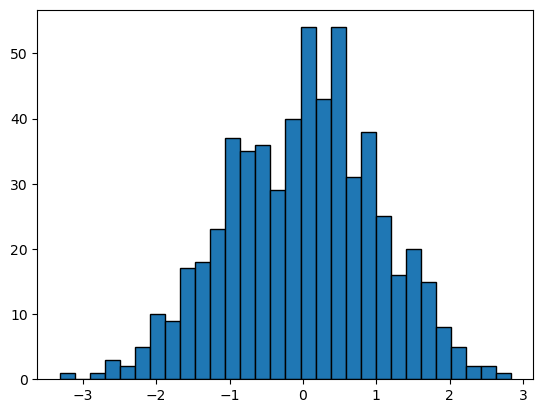

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(err_train,bins=30,edgecolor='black')
plt.show()

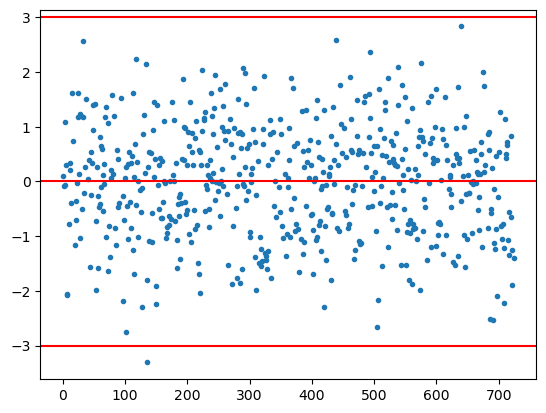

In [33]:
plt.plot(err_train,'.')# a scatter plot on errors
plt.axhline(y=0,color='red')
plt.axhline(y=3,color='red')
plt.axhline(y=-3,color='red')

<Axes: ylabel='LungCap'>

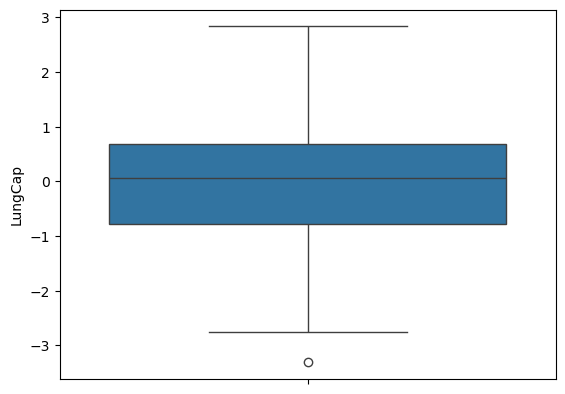

In [34]:
sns.boxplot(err_train)

In [35]:
actual_pred_train = pd.DataFrame()
actual_pred_train['Actual'] = train_lc_y
actual_pred_train['Pred'] = pred_train

<Axes: xlabel='Actual', ylabel='Pred'>

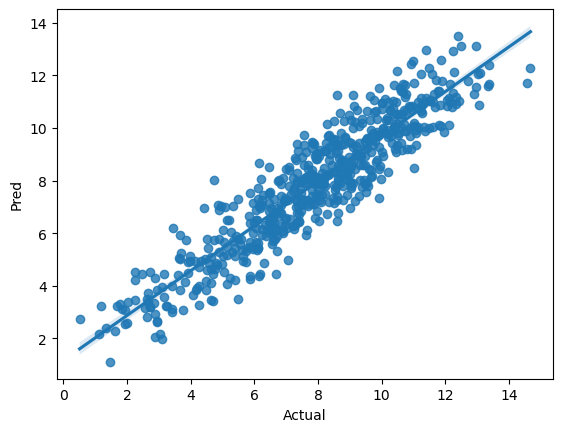

In [36]:
sns.regplot(x='Actual',y='Pred',data=actual_pred_train)

In [37]:
# assumptions are used only in train data

In [38]:
# Higher the Rsquare better is the model
# lower the mse,mae  better is the model

In [39]:
# MSE RSME, MAE are not range bound mean they dont have significance untill 2 or more models are created
# Most important is mape i.e percentage error.

In [40]:
# Assumptions in Linear regression
# 1. There is linear relationship between x and y
# 2. Minimum multicolinearty among x variable----> if this assumption breaks then small change in x will result in large change in y---> large errors
#  i don't want high correlation between x
# 3. error terms are normally distributed ---> There is no pattern amoung them. 
# 4. Homosedacity --. variance around the regression line same for the predicted val.

In [41]:
cp=pd.read_csv(r'C:\Users\alurp\Downloads\car_price.csv')

In [42]:
cp.head(2)

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [43]:
cp.isnull().sum()[cp.isnull().sum()>0]

Series([], dtype: int64)

In [44]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [45]:
cp.normalized_losses.unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [46]:
import pandas as pd
import numpy as np

# Replace non-numeric values like '?' with NaN
cp.normalized_losses = cp.normalized_losses.replace('?', np.nan)

# Convert the column to numeric, which will handle NaNs automatically
cp.normalized_losses = pd.to_numeric(cp.normalized_losses, errors='coerce')
cp.normalized_losses = cp.normalized_losses.fillna(cp.normalized_losses.mean())

cp.info()
#cp.normalized_losses = cp.normalized_losses.astype('int64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [47]:
cp.Fuel_type.unique()

array(['gas', 'diesel'], dtype=object)

In [48]:
cp.Fuel_type.replace({'gas':0 , 'diesel':1} , inplace= True)


C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\471815989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cp.Fuel_type.replace({'gas':0 , 'diesel':1} , inplace= True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\471815989.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cp.Fuel_type.re

In [49]:
cp.make.unique()

array(['std', 'turbo'], dtype=object)

In [50]:
cp.make.replace({'std':0 , 'turbo':1} , inplace= True)


C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\3202297071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cp.make.replace({'std':0 , 'turbo':1} , inplace= True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\3202297071.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cp.make.replace({'s

In [51]:
cp.num_of_doors.replace({'two':2 , 'four':4,'?':0} , inplace= True)


C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\3233985471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cp.num_of_doors.replace({'two':2 , 'four':4,'?':0} , inplace= True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\3233985471.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cp.num

In [52]:
cp.num_of_doors.unique()

array([2, 4, 0], dtype=int64)

In [53]:
cp.aspiration.replace({'convertible':0 , 'hatchback':1,'sedan':2,'wagon':3,'hardtop':4} , inplace= True)



C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\2844620288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cp.aspiration.replace({'convertible':0 , 'hatchback':1,'sedan':2,'wagon':3,'hardtop':4} , inplace= True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\2844620288.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

In [54]:
cp.aspiration.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [55]:
cp.wheel_base.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [56]:
cp.wheel_base.replace({'rwd':0 , 'fwd':1,'4wd':2} , inplace= True)


C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\1783604724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cp.wheel_base.replace({'rwd':0 , 'fwd':1,'4wd':2} , inplace= True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\1783604724.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cp.whee

In [57]:
cp.engine_location.unique()

array(['front', 'rear'], dtype=object)

In [58]:
cp.engine_location.replace({'front':0 , 'rear':1} , inplace= True)


C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\3642994082.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cp.engine_location.replace({'front':0 , 'rear':1} , inplace= True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\3642994082.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cp.engi

In [59]:
cp.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [60]:
cp.peak_rpm.unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [61]:
cp.fuel_system.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [62]:
cp.fuel_system.replace({'mpfi':0 , '2bbl':1 ,'mfi':2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7} , inplace= True)


C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\1832715560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cp.fuel_system.replace({'mpfi':0 , '2bbl':1 ,'mfi':2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7} , inplace= True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\1832715560.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_op

In [63]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   Fuel_type          205 non-null    int64  
 3   make               205 non-null    int64  
 4   num_of_doors       205 non-null    int64  
 5   aspiration         205 non-null    int64  
 6   wheel_base         205 non-null    int64  
 7   engine_location    205 non-null    int64  
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [64]:
cp.body_style.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [65]:
cp.body_style.replace({'alfa-romero':0, 'audi':1, 'bmw':2, 'chevrolet':3, 'dodge':4, 'honda':5,
       'isuzu':6, 'jaguar':7, 'mazda':8, 'mercedes-benz':9, 'mercury':10,
       'mitsubishi':11, 'nissan':12, 'peugot':13, 'plymouth':14, 'porsche':15, 'renault':16,
       'saab':17, 'subaru':18, 'toyota':19, 'volkswagen':20, 'volvo':21} , inplace= True)


C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\1375972642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cp.body_style.replace({'alfa-romero':0, 'audi':1, 'bmw':2, 'chevrolet':3, 'dodge':4, 'honda':5,
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\1375972642.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_d

In [66]:
cp.engine_type.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [67]:
cp.engine_type.replace({'dohc':0, 'ohcv':2, 'ohc':3, 'l':1, 'rotor':4, 'ohcf':5, 'dohcv':6} , inplace= True)


C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\1385667741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cp.engine_type.replace({'dohc':0, 'ohcv':2, 'ohc':3, 'l':1, 'rotor':4, 'ohcf':5, 'dohcv':6} , inplace= True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\1385667741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futur

In [68]:
cp.num_of_cylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [69]:
cp.num_of_cylinders.replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8} , inplace= True)


C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\2757156670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cp.num_of_cylinders.replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8} , inplace= True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17672\2757156670.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opt

In [70]:
cp.bore.replace('?', np.nan)

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [71]:
cp.bore=pd.to_numeric(cp.bore, errors='coerce')

In [72]:
cp.bore = cp.bore.fillna(cp.bore.mean())


In [73]:
cp.bore.unique()

array([3.47      , 2.68      , 3.19      , 3.13      , 3.5       ,
       3.31      , 3.62      , 2.91      , 3.03      , 2.97      ,
       3.34      , 3.6       , 2.92      , 3.15      , 3.43      ,
       3.63      , 3.54      , 3.08      , 3.32975124, 3.39      ,
       3.76      , 3.58      , 3.46      , 3.8       , 3.78      ,
       3.17      , 3.35      , 3.59      , 2.99      , 3.33      ,
       3.7       , 3.61      , 3.94      , 3.74      , 2.54      ,
       3.05      , 3.27      , 3.24      , 3.01      ])

In [74]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   Fuel_type          205 non-null    int64  
 3   make               205 non-null    int64  
 4   num_of_doors       205 non-null    int64  
 5   aspiration         205 non-null    int64  
 6   wheel_base         205 non-null    int64  
 7   engine_location    205 non-null    int64  
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    int64  
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    int64  
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

In [75]:
cp.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [76]:
cp.stroke.unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [77]:
cp.stroke.replace('?', np.nan)
cp.stroke=pd.to_numeric(cp.stroke, errors='coerce')
cp.stroke = cp.stroke.fillna(cp.stroke.mean())


In [78]:
cp.horsepower.replace('?', np.nan)
cp.horsepower=pd.to_numeric(cp.horsepower, errors='coerce')
cp.horsepower = cp.horsepower.fillna(cp.horsepower.mean())


In [79]:
cp.peak_rpm.replace('?', np.nan)
cp.peak_rpm=pd.to_numeric(cp.peak_rpm, errors='coerce')
cp.peak_rpm = cp.peak_rpm.fillna(cp.peak_rpm.mean())


In [80]:
cp.price.replace('?', np.nan)
cp.price=pd.to_numeric(cp.price, errors='coerce')
cp.price = cp.price.fillna(cp.price.mean())


In [81]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   Fuel_type          205 non-null    int64  
 3   make               205 non-null    int64  
 4   num_of_doors       205 non-null    int64  
 5   aspiration         205 non-null    int64  
 6   wheel_base         205 non-null    int64  
 7   engine_location    205 non-null    int64  
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    int64  
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    int64  
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

In [82]:
cp.normalized_losses.unique()

array([122., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

In [202]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   Fuel_type          205 non-null    int64  
 3   make               205 non-null    int64  
 4   num_of_doors       205 non-null    int64  
 5   aspiration         205 non-null    int64  
 6   wheel_base         205 non-null    int64  
 7   engine_location    205 non-null    int64  
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    int64  
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    int64  
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

In [206]:
cp.isnull().sum()[cp.isnull().sum()>0]

Series([], dtype: int64)

In [210]:
cp.select_dtypes(include='object').columns

Index([], dtype='object')

In [460]:
cp=df1

In [462]:
from sklearn.model_selection import train_test_split
train_cp , test_cp= train_test_split(cp)

train_cp_x =train_cp.iloc[: ,0:-1] #select alll x variable
train_cp_y =train_cp.iloc[: ,-1] # select only y

test_cp_x =test_cp.iloc[: ,0:-1] #select alll x variable
test_cp_y =test_cp.iloc[: ,-1] # select only y

In [464]:
from sklearn.linear_model import LinearRegression
linreg_cp = LinearRegression()
linreg_cp.fit(train_cp_x , train_cp_y )

LinearRegression()

In [466]:
Rsquare=linreg_cp.score(train_cp_x , train_cp_y)
Rsquare


0.8084898603897057

In [468]:
N = train_cp_x.shape[0]
K = train_cp_x.shape[1]
Adj_Rsqu = 1 - (1-Rsquare) * (N-1) / (N-K-1)
Adj_Rsqu

0.7628922081015403

In [470]:
pred_train_cp=linreg_cp.predict(train_cp_x)
pred_test_cp=linreg_cp.predict(test_cp_x)

In [472]:
err_train_cp=train_cp_y-pred_train_cp
err_test_cp=test_cp_y-pred_test_cp

In [474]:
err_train_cp.mean()


2.638228905906204e-13

In [476]:
err_train_cp.skew()


0.6258338358483077

In [478]:
err_train_cp.kurtosis()+3


4.194830174261686

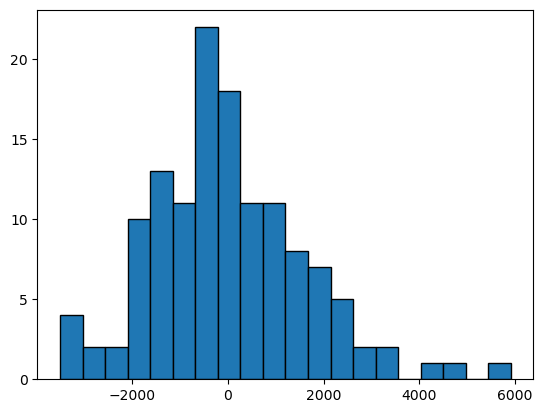

In [480]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(err_train_cp,bins=20,edgecolor='black')
plt.show()

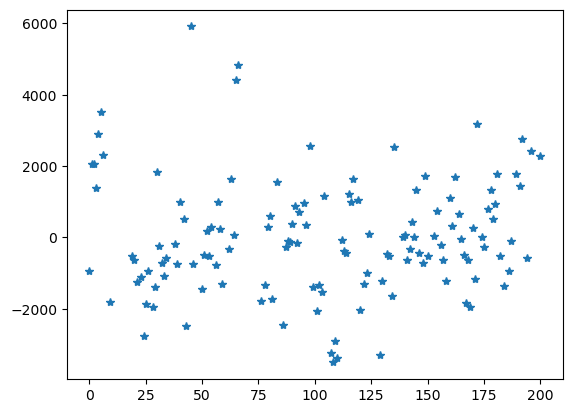

In [482]:
plt.plot(err_train_cp,'*')


<Axes: ylabel='price'>

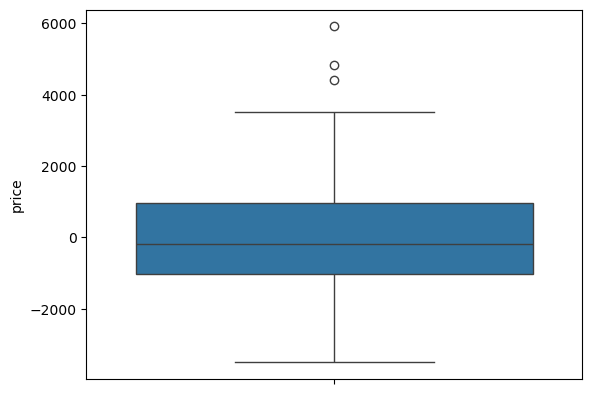

In [484]:
sns.boxplot(err_train_cp) # gives large errors


In [486]:
actual_pred_train = pd.DataFrame()
actual_pred_train['Actual'] = train_cp_y
actual_pred_train['Pred'] = pred_train_cp

<Axes: xlabel='Actual', ylabel='Pred'>

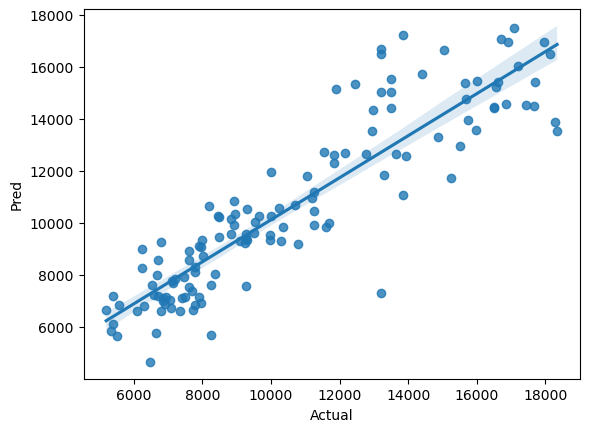

In [488]:
sns.regplot(x='Actual',y='Pred',data=actual_pred_train)


In [490]:
import numpy as np
mse_train_cp=np.mean(np.square(err_train_cp))
mse_test_cp=np.mean(np.square(err_test_cp))
print('Mse of train is',mse_train_cp)
print('Mse of test is',mse_test_cp)

Mse of train is 2631183.033314884
Mse of test is 4545600.077052232


In [492]:
rsme_train_cp=np.sqrt(mse_train_cp)
rsme_test_cp=np.sqrt(mse_test_cp)
print('Rmse of train',rsme_train_cp)
print('Rmse of test',rsme_test_cp)

Rmse of train 1622.0921778107693
Rmse of test 2132.04129346789


In [494]:
Mape_train_cp=np.mean(np.abs(err_train_cp*100/train_cp_y))
Mape_test_cp=np.mean(np.abs(err_test_cp*100/test_cp_y))
print('Mape of train',np.mean(np.abs(err_train_cp*100/train_cp_y)))
print('Mape of test',np.mean(np.abs(err_test_cp*100/test_cp_y)))

Mape of train 11.778742213391258
Mape of test 14.36049534258977


In [456]:
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1
    sd = df[col].std()
    final_list=[x for x in df[col] if (x>mean-k*sd)]
    final_list=[x for x in final_list if (x<mean+k*sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("Number of outliers removed-->",df.shape[0]-df1.shape[0])

In [458]:
remove_outliers(cp,'price',2)


(175, 26)
Number of outliers removed--> 4
